In [5]:
import os
import rawpy
import numpy as np
import math
import seaborn as sns 

## GAMMA ANALYSIS

In [45]:
file = open('./dataset/Sony_train_list.txt').read()
pairs = file.split('\n')
np.random.shuffle(pairs)
pairs = pairs[:200]
inp = list()
out = list()
for pair in pairs:
    i = pair.split()[0]
    o = pair.split()[1]
    inp.append(i)
    out.append(o)

In [ ]:
inp_images = []
out_images= []
os.chdir('./dataset')
count = 1
for i, o in zip(inp, out):
    print(count)
    image_i = rawpy.imread(i).postprocess()
    image_o = rawpy.imread(o).postprocess()
    inp_images.append(image_i)
    out_images.append(image_o)
    count+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


In [6]:
gammas = []
for i, o in zip(inp_images, out_images):
    ai = np.average(i, axis=None)
    ao = np.average(o, axis=None)
    gamma = math.log(ai, ao) 
    gammas.append(gamma)

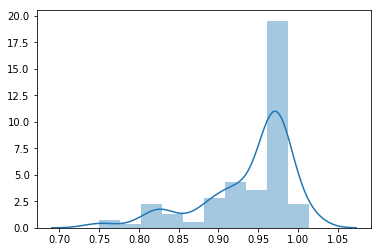

In [7]:
sns.distplot(gammas, bins=10)

In [18]:
a = np.power(out_images[0], gammas[0])
b = inp_images[0]
np.average(np.divide(a, b, out=np.zeros_like(a), where=b!=0))

0.9242999517116693

## White Balance

In [2]:
channel1 = []
channel2 = []
channel3 = []
chosen = []
idx = 0
for i, o, g in zip(inp_images, out_images, gammas):
    avg = np.divide(np.power(o, g), i, out=np.zeros_like(np.power(o, g)), where=i!=0)
    c1 = np.average(avg[:, :, 0])
    c2 = np.average(avg[:, :, 1])
    c3 = np.average(avg[:, :, 2])
    
    if c3<0.5:
        chosen.append(idx)
    idx+=1
    channel1.append(c1)
    channel2.append(c2)
    channel3.append(c3)

NameError: name 'inp_images' is not defined

In [1]:
chosen

NameError: name 'chosen' is not defined

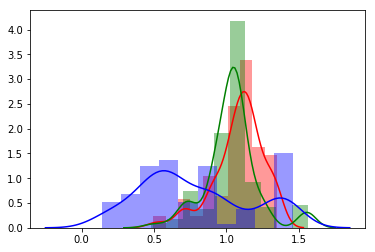

In [30]:
sns.distplot(channel1, bins=10, color='red', label='red')
sns.distplot(channel2, bins=10, color='green', label='green')
sns.distplot(channel3, bins=10, color='blue', label='blue')

In [31]:
np.mean(gammas)

0.9385052662695847

In [32]:
np.std(gammas)

0.05737254725788266

In [33]:
np.mean(channel1)

1.0844106930923454

In [34]:
np.std(channel1)

0.17400758387777354

In [35]:
np.mean(channel2)

1.036825339892964

In [36]:
np.std(channel2)

0.1837113075741062

In [37]:
np.mean(channel3)

0.7784414669938244

In [38]:
np.std(channel3)

0.37442538017543864

## Black Level

In [39]:
bls = []
for i, o, g, c1, c2, c3 in zip(inp_images, out_images, gammas, channel1, channel2, channel3):
    temp = o
    gimg = np.power(temp, g)
    temp[:, :, 0] = temp[:, :, 0]*0.8
    temp[:, :, 1] = temp[:, :, 0]*0.8
    temp[:, :, 2] = temp[:, :, 0]*0.7
    sub = np.subtract(temp, i)
    bls.append(np.average(sub))

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


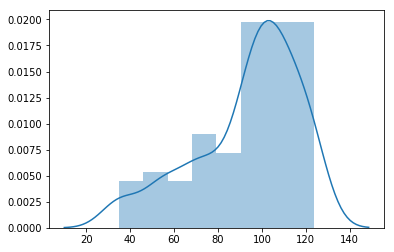

In [40]:
sns.distplot(bls)

In [41]:
np.mean(bls)

93.32770355749693